In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.plotly as py 
from datetime import timedelta
import datetime
from fbprophet import Prophet

In [2]:
df = pd.read_csv('one.csv')

In [3]:
df.head()

,Unnamed: 0,visit_date,air_area_name,air_genre_name,air_store_id,visitors,latitude,longitude,day_of_week,holiday_flg,visit_date2
0,3,1/1/2016,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,33,33.589216,130.392813,Friday,1,2016-01-01
1,23357,1/6/2016,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,17,33.589216,130.392813,Wednesday,0,2016-01-06
2,24327,1/7/2016,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,15,33.589216,130.392813,Thursday,0,2016-01-07
3,25328,1/8/2016,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,31,33.589216,130.392813,Friday,0,2016-01-08
4,26216,1/9/2016,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,22,33.589216,130.392813,Saturday,0,2016-01-09


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)


In [18]:
df.tail()

,visit_date,air_area_name,air_genre_name,air_store_id,visitors,latitude,longitude,day_of_week,holiday_flg,visit_date2
468,4/18/2017,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,36,33.589216,130.392813,Tuesday,0,2017-04-18
469,4/19/2017,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,46,33.589216,130.392813,Wednesday,0,2017-04-19
470,4/20/2017,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,62,33.589216,130.392813,Thursday,0,2017-04-20
471,4/21/2017,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,34,33.589216,130.392813,Friday,0,2017-04-21
472,4/22/2017,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,50,38,33.589216,130.392813,Saturday,0,2017-04-22


In [6]:
fb_df = df[['visit_date', 'visitors']]

In [7]:
fb_df.columns = ['ds', 'y']
fb_df.head()

,ds,y
0,1/1/2016,33
1,1/6/2016,17
2,1/7/2016,15
3,1/8/2016,31
4,1/9/2016,22


In [8]:
m1 = Prophet(daily_seasonality=True)
m1.fit(fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\ejohn\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [9]:
future1 = m1.make_future_dataframe(periods=7)
forecast1 = m1.predict(future1)
forecast1.tail().T

,475,476,477,478,479
ds,2017-04-25 00:00:00,2017-04-26 00:00:00,2017-04-27 00:00:00,2017-04-28 00:00:00,2017-04-29 00:00:00
trend,41.4965,41.5154,41.5343,41.5532,41.572
yhat_lower,19.129,20.2477,13.9921,26.7169,27.4677
yhat_upper,55.6527,56.4905,51.9345,64.71,65.9463
trend_lower,41.4965,41.5154,41.5343,41.5531,41.572
trend_upper,41.4965,41.5154,41.5343,41.5532,41.5721
additive_terms,-4.01952,-3.12859,-8.87738,4.43047,6.23869
additive_terms_lower,-4.01952,-3.12859,-8.87738,4.43047,6.23869
additive_terms_upper,-4.01952,-3.12859,-8.87738,4.43047,6.23869
daily,-1.48336,-1.48336,-1.48336,-1.48336,-1.48336


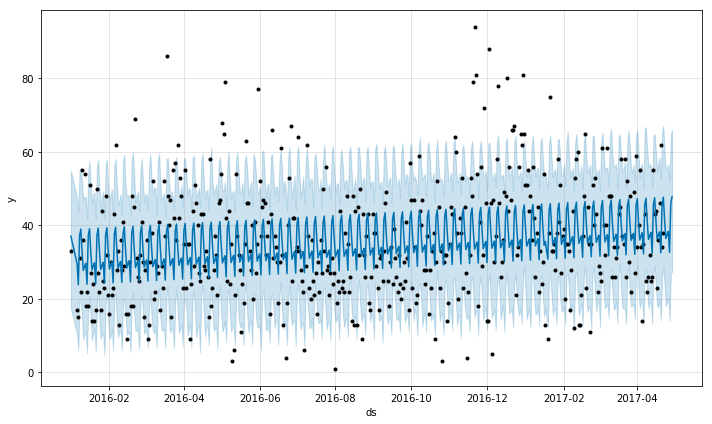

In [10]:
m1.plot(forecast1);

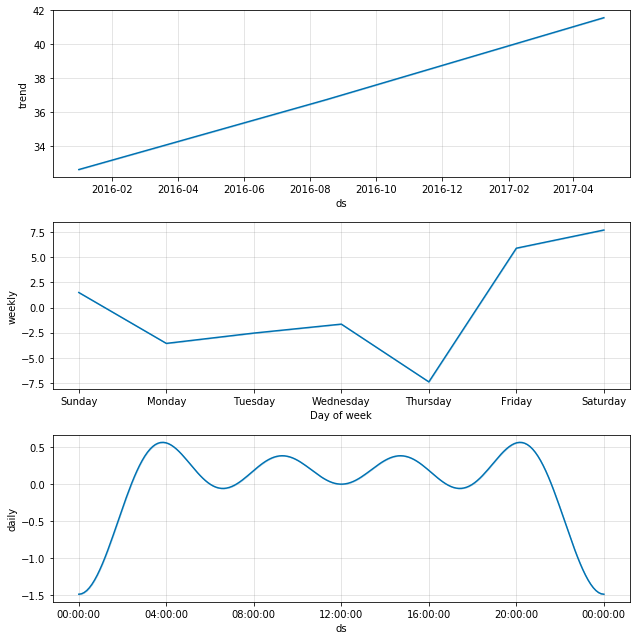

In [11]:
m1.plot_components(forecast1);

In [12]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m1, initial='470 days', period='1 days', horizon = '1 days')
df_cv

INFO:fbprophet:Making 7 forecasts with cutoffs between 2017-04-15 00:00:00 and 2017-04-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-04-16,41.705985,24.320938,59.425319,44,2017-04-15
1,2017-04-17,36.855839,16.439386,56.207056,23,2017-04-16
2,2017-04-18,37.250436,19.679719,57.240223,36,2017-04-17
3,2017-04-19,38.148245,20.386705,56.957584,46,2017-04-18
4,2017-04-20,32.293449,14.123945,51.425492,62,2017-04-19
5,2017-04-21,46.508729,28.784176,65.594537,34,2017-04-20
6,2017-04-22,48.046388,29.797662,67.124971,38,2017-04-21


In [13]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,coverage
0,1 days,200.048259,14.143842,11.073387,0.28163,0.857143


In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
r2_score(df_cv.y, df_cv.yhat)

-0.5918097894016741